# Submmission for the bobcat in a box thanksgiving data contest 2020
Brittany Howard, brittahoward14@gmail.com

<img src="bobby.jpg" style="width: 500px;"/>

### Import things and ignore all the warnings from tensorflow

In [1]:
import pandas as pd
import numpy as np
from heapq import nlargest
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import fbeta_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.models import load_model
from keras.metrics import Precision
import keras.backend as k
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
C:\Users\britt\miniconda3\envs\bobcat_env_36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\britt\miniconda3\envs\bobcat_env_36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\britt\miniconda3\envs\bobcat_env_36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\britt\minic

### Load provided data

In [2]:
test_boxes = pd.read_csv('tbl_test_boxes.csv')
train_boxes = pd.read_csv('tbl_train_boxes.csv')
unboxer_attributes = pd.read_csv('tbl_unboxer_attributes.csv')
unboxer_keywords = pd.read_csv('tbl_unboxer_keywords.csv')
vendor_keywords = pd.read_csv('tbl_vendor_keywords.csv')

C:\Users\britt\miniconda3\envs\bobcat_env_36\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (61,63) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Examine and prepare the data

Let's start with test and train boxes.

In [3]:
test_boxes

,unboxer_id,vendor_id,target_bobcat
0,1,8324,NaN
1,1,10738,NaN
2,1,21305,NaN
3,1,45447,NaN
4,1,50490,NaN
...,...,...,...
116832,9421,66201,NaN
116833,9421,67055,NaN
116834,9421,68334,NaN
116835,9421,70180,NaN


In [4]:
train_boxes

,unboxer_id,vendor_id,target_bobcat
0,2116,53597,0
1,6430,17968,0
2,466,44148,0
3,3174,33479,0
4,8573,62492,1
...,...,...,...
116832,2961,17803,0
116833,4348,13982,0
116834,8749,40771,0
116835,219,52341,0



Looking simple enough. Now let's look at unboxer attributes:

In [5]:
unboxer_attributes

,unboxer_id,feature_skimask1,feature_skimask2,feature_skimask3,feature_skimask4,feature_skimask5,feature_skimask6,feature_skimask7,feature_skimask8,feature_skimask9,...,feature_skimask56,feature_skimask57,feature_skimask58,feature_skimask59,feature_skimask60,feature_beartrap1,feature_beartrap2,feature_beartrap3,feature_beartrap4,feature_beartrap5
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9,0,15
1,2,-1.0,1.0,-1.0,0.0,-1.0,-1.0,-1.0,0.0,1.0,...,-1.0,-1.0,-1.0,-1.0,0.0,NaN,0.0,9,0,103
2,3,1.0,-1.0,-1.0,0.0,1.0,0.0,-1.0,0.0,0.0,...,-1.0,0.0,1.0,0.0,0.0,77,0.0,9,0,56
3,4,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,...,-1.0,1.0,1.0,-1.0,1.0,NaN,0.0,9,0,56
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9,0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9022,9023,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,...,-1.0,1.0,1.0,0.0,1.0,NaN,0.0,7,0,94
9023,9024,0.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,...,-1.0,0.0,-1.0,0.0,0.0,NaN,0.0,9,0,100
9024,9025,NaN,NaN,NaN,NaN,-1.0,NaN,1.0,NaN,NaN,...,-1.0,NaN,NaN,NaN,NaN,NaN,0.0,9,0,22
9025,9026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9,0,4


There are a lot of nans here, and a ton of columns. Let's see if any are insignificant:

In [6]:
unboxer_attributes.isnull().sum()

unboxer_id              0
feature_skimask1     6004
feature_skimask2     5199
feature_skimask3     5090
feature_skimask4     5971
                     ... 
feature_beartrap1    6338
feature_beartrap2     224
feature_beartrap3      66
feature_beartrap4       0
feature_beartrap5     925
Length: 66, dtype: int64

Text(0, 0.5, 'number of features')

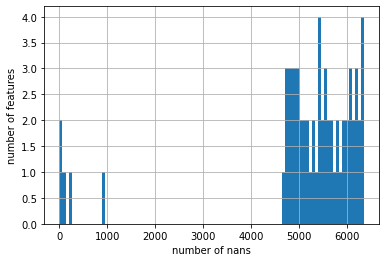

In [7]:
ax = unboxer_attributes.isnull().sum().hist(bins=100)
ax.set_xlabel('number of nans')
ax.set_ylabel('number of features')

Okay, it seems like there are a great many features where half or more of the rows are missing data. I will omit those features. Let's do that and check the plot again.

In [8]:
unboxer_attributes = unboxer_attributes[[c for c in unboxer_attributes if unboxer_attributes[c].isnull().sum() <= 500]] # allow 500 nans per feature

Text(0, 0.5, 'number of features')

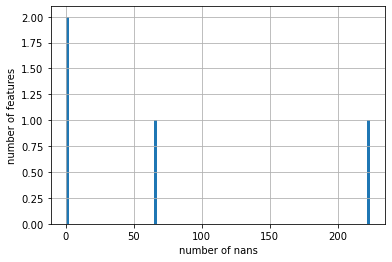

In [9]:
ax = unboxer_attributes.isnull().sum().hist(bins=100)
ax.set_xlabel('number of nans')
ax.set_ylabel('number of features')

In [10]:
unboxer_attributes

,unboxer_id,feature_beartrap2,feature_beartrap3,feature_beartrap4
0,1,0.0,9,0
1,2,0.0,9,0
2,3,0.0,9,0
3,4,0.0,9,0
4,5,0.0,9,0
...,...,...,...,...
9022,9023,0.0,7,0
9023,9024,0.0,9,0
9024,9025,0.0,9,0
9025,9026,0.0,9,0


Well, now we're down to only 4 columns. Hopefully we still have enough data. What will I do with the nan's though? I guess I'll set them to 0 and see how it goes.

In [11]:
unboxer_attributes = unboxer_attributes.fillna(0)

And now I need to one hot encode the features:

In [12]:
# need to one hot encode
unboxer_attributes = pd.get_dummies(unboxer_attributes)

Let's move on to unboxer keywords.

In [13]:
unboxer_keywords

,unboxer_id,keyword_id,enabled
0,9121,249,1
1,9089,249,1
2,9089,1963,1
3,9089,46,-1
4,9045,885,1
...,...,...,...
243056,1886,674,1
243057,4174,436,1
243058,4174,443,1
243059,4174,1056,1


How often does each keyword come up?

Text(0, 0.5, 'number of keywords')

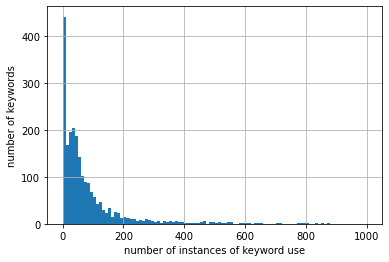

In [14]:
ax = unboxer_keywords.groupby('keyword_id').count().unboxer_id.hist(bins=100, range=(0,1000))
ax.set_xlabel('number of instances of keyword use')
ax.set_ylabel('number of keywords')

Let's drop all the keywords that have number of instances < 250 for now:

In [15]:
unboxer_keywords = unboxer_keywords.groupby('keyword_id').filter(lambda x: len(x) >= 250)

Need to one hot encode this:

In [16]:
# replace -1s with 0s
unboxer_keywords = unboxer_keywords.replace(-1, 0)

# need to one hot encode
unboxer_keywords['keyword_id'] = unboxer_keywords['keyword_id'].astype('category')
unboxer_keywords = pd.get_dummies(unboxer_keywords)
cols_to_multiply = unboxer_keywords.columns.to_list()[2:]

print('multiplying...')

# use numpy for faster multiplication
product = unboxer_keywords[cols_to_multiply].values * unboxer_keywords['enabled'][:, np.newaxis]

print('converting back to df...')
# put it back into a dataframe
cols_to_multiply.insert(0, 'unboxer_id')
arr = np.hstack((unboxer_keywords['unboxer_id'].values[:, np.newaxis], product))
unboxer_keywords = pd.DataFrame(data=arr, columns=cols_to_multiply)

multiplying...
converting back to df...


And now we need to aggregate this by unboxer id:

In [17]:
unboxer_keywords_agg = unboxer_keywords.groupby('unboxer_id').sum()

In [18]:
# let's see the final product:
unboxer_keywords_agg

,keyword_id_4,keyword_id_10,keyword_id_23,keyword_id_31,keyword_id_35,keyword_id_42,keyword_id_46,keyword_id_63,keyword_id_96,keyword_id_109,...,keyword_id_2278,keyword_id_2288,keyword_id_2289,keyword_id_2291,keyword_id_2300,keyword_id_2309,keyword_id_2316,keyword_id_2322,keyword_id_2344,keyword_id_2368
unboxer_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And vendor keywords:

In [19]:
vendor_keywords

,vendor_id,keyword_id,enabled
0,44975.0,244.0,1.0
1,44975.0,2117.0,1.0
2,44975.0,2063.0,1.0
3,44975.0,1417.0,1.0
4,44975.0,1620.0,1.0
...,...,...,...
1048570,NaN,NaN,NaN
1048571,NaN,NaN,NaN
1048572,NaN,NaN,NaN
1048573,NaN,NaN,NaN


In [20]:
# how many rows are all nans?
print(len(vendor_keywords)-len(vendor_keywords.dropna(how='all')))

614822


In [21]:
# how many rows have at least one nan?
print(len(vendor_keywords)-len(vendor_keywords.dropna(how='any')))

614822


Okay, so we have some rows which are all nan's and no rows which have some but not all nan's. I will drop the all nan rows:

In [22]:
vendor_keywords = vendor_keywords.dropna(how='all')

Let's check which keywords are most used here:

Text(0, 0.5, 'number of keywords')

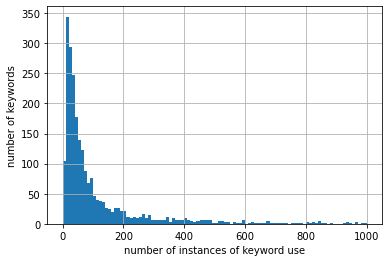

In [23]:
ax = vendor_keywords.groupby('keyword_id').count().vendor_id.hist(bins=100, range=(0,1000))
ax.set_xlabel('number of instances of keyword use')
ax.set_ylabel('number of keywords')

The drop-off is not as steep this time, so I will drop keywords with number of instances > 450.

In [24]:
vendor_keywords = vendor_keywords.groupby('keyword_id').filter(lambda x: len(x) >= 450)

Now I need to one hot encode:

In [25]:
# replace -1s with 0s for constency
vendor_keywords = vendor_keywords.replace(-1, 0)

# need to one hot encode
vendor_keywords['keyword_id'] = vendor_keywords['keyword_id'].astype('category')
vendor_keywords = pd.get_dummies(vendor_keywords)

cols_to_multiply = vendor_keywords.columns.to_list()[2:]

# use numpy for faster multiplication
product = vendor_keywords[cols_to_multiply].values * vendor_keywords['enabled'][:, np.newaxis]

# put it back into a dataframe
cols_to_multiply.insert(0, 'vendor_id')
arr = np.hstack((vendor_keywords['vendor_id'].values[:, np.newaxis], product))
vendor_keywords = pd.DataFrame(data=arr, columns=cols_to_multiply)

# need to aggregate by user_id
print('aggregating...')
vendor_keywords_agg = vendor_keywords.groupby('vendor_id').sum()

aggregating...


In [26]:
# let's see the finished product:
vendor_keywords_agg

,keyword_id_8.0,keyword_id_20.0,keyword_id_23.0,keyword_id_31.0,keyword_id_34.0,keyword_id_35.0,keyword_id_42.0,keyword_id_46.0,keyword_id_72.0,keyword_id_76.0,...,keyword_id_2297.0,keyword_id_2299.0,keyword_id_2300.0,keyword_id_2328.0,keyword_id_2335.0,keyword_id_2338.0,keyword_id_2347.0,keyword_id_2354.0,keyword_id_2355.0,keyword_id_2368.0
vendor_id,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75118.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Merge the dataframes into one master dataframe 
Start with the train set:

In [27]:
n_fillna = -1  # to replace nans

In [28]:
# merge the unboxer attributes
train_merged = train_boxes.merge(unboxer_attributes, on='unboxer_id', how='left')

In [29]:
train_merged

,unboxer_id,vendor_id,target_bobcat,feature_beartrap2,feature_beartrap4,feature_beartrap3_0,feature_beartrap3_1.0,feature_beartrap3_2.0,feature_beartrap3_3.0,feature_beartrap3_4.0,...,feature_beartrap3_15,feature_beartrap3_2,feature_beartrap3_3,feature_beartrap3_4,feature_beartrap3_5,feature_beartrap3_6,feature_beartrap3_7,feature_beartrap3_8,feature_beartrap3_9,feature_beartrap3_Turkey Contest Feature ID
0,2116,53597,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,6430,17968,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,466,44148,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3174,33479,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,8573,62492,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116832,2961,17803,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
116833,4348,13982,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
116834,8749,40771,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116835,219,52341,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
# do we have any nans after the merge?
train_merged.isnull().sum()

unboxer_id                                       0
vendor_id                                        0
target_bobcat                                    0
feature_beartrap2                              173
feature_beartrap4                              173
feature_beartrap3_0                            173
feature_beartrap3_1.0                          173
feature_beartrap3_2.0                          173
feature_beartrap3_3.0                          173
feature_beartrap3_4.0                          173
feature_beartrap3_5.0                          173
feature_beartrap3_6.0                          173
feature_beartrap3_7.0                          173
feature_beartrap3_8.0                          173
feature_beartrap3_9.0                          173
feature_beartrap3_11.0                         173
feature_beartrap3_12.0                         173
feature_beartrap3_13.0                         173
feature_beartrap3_15.0                         173
feature_beartrap3_1            

In [31]:
# I can't drop nans in the test set, so I'll have to fill them in with some number
train_merged = train_merged.fillna(n_fillna)

In [32]:
# merge the unboxer keywords
train_merged = train_merged.merge(unboxer_keywords_agg, on='unboxer_id', how='left')

In [33]:
train_merged

,unboxer_id,vendor_id,target_bobcat,feature_beartrap2,feature_beartrap4,feature_beartrap3_0,feature_beartrap3_1.0,feature_beartrap3_2.0,feature_beartrap3_3.0,feature_beartrap3_4.0,...,keyword_id_2278,keyword_id_2288,keyword_id_2289,keyword_id_2291,keyword_id_2300,keyword_id_2309,keyword_id_2316,keyword_id_2322,keyword_id_2344,keyword_id_2368
0,2116,53597,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6430,17968,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,466,44148,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3174,33479,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8573,62492,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116832,2961,17803,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
116833,4348,13982,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116834,8749,40771,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116835,219,52341,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# now how many nans do I have? ... quite a few
train_merged.isnull().sum()

unboxer_id               0
vendor_id                0
target_bobcat            0
feature_beartrap2        0
feature_beartrap4        0
                     ...  
keyword_id_2309      23361
keyword_id_2316      23361
keyword_id_2322      23361
keyword_id_2344      23361
keyword_id_2368      23361
Length: 217, dtype: int64

In [35]:
# for lack of a better plan, I'm going to fill the nan rows again
train_merged = train_merged.fillna(n_fillna)

In [36]:
# now merge in the vendor keywords
train_merged = train_merged.merge(vendor_keywords_agg, on='vendor_id', how='left')

In [37]:
train_merged

,unboxer_id,vendor_id,target_bobcat,feature_beartrap2,feature_beartrap4,feature_beartrap3_0,feature_beartrap3_1.0,feature_beartrap3_2.0,feature_beartrap3_3.0,feature_beartrap3_4.0,...,keyword_id_2297.0,keyword_id_2299.0,keyword_id_2300.0,keyword_id_2328.0,keyword_id_2335.0,keyword_id_2338.0,keyword_id_2347.0,keyword_id_2354.0,keyword_id_2355.0,keyword_id_2368.0
0,2116,53597,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6430,17968,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,466,44148,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3174,33479,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8573,62492,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116832,2961,17803,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116833,4348,13982,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116834,8749,40771,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116835,219,52341,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# now how many nans do I have? ... only 400 this time
train_merged.isnull().sum()

unboxer_id              0
vendor_id               0
target_bobcat           0
feature_beartrap2       0
feature_beartrap4       0
                     ... 
keyword_id_2338.0    2433
keyword_id_2347.0    2433
keyword_id_2354.0    2433
keyword_id_2355.0    2433
keyword_id_2368.0    2433
Length: 400, dtype: int64

In [39]:
# for lack of a better plan, I'm going to fill the nan rows again
train_merged = train_merged.fillna(n_fillna)

In [40]:
# final product:
train_merged

,unboxer_id,vendor_id,target_bobcat,feature_beartrap2,feature_beartrap4,feature_beartrap3_0,feature_beartrap3_1.0,feature_beartrap3_2.0,feature_beartrap3_3.0,feature_beartrap3_4.0,...,keyword_id_2297.0,keyword_id_2299.0,keyword_id_2300.0,keyword_id_2328.0,keyword_id_2335.0,keyword_id_2338.0,keyword_id_2347.0,keyword_id_2354.0,keyword_id_2355.0,keyword_id_2368.0
0,2116,53597,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6430,17968,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,466,44148,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3174,33479,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8573,62492,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116832,2961,17803,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
116833,4348,13982,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116834,8749,40771,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
116835,219,52341,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


Now do the same things to the test set:

In [41]:
# merge the unboxer attributes
test_merged = test_boxes.merge(unboxer_attributes, on='unboxer_id', how='left')
test_merged

,unboxer_id,vendor_id,target_bobcat,feature_beartrap2,feature_beartrap4,feature_beartrap3_0,feature_beartrap3_1.0,feature_beartrap3_2.0,feature_beartrap3_3.0,feature_beartrap3_4.0,...,feature_beartrap3_15,feature_beartrap3_2,feature_beartrap3_3,feature_beartrap3_4,feature_beartrap3_5,feature_beartrap3_6,feature_beartrap3_7,feature_beartrap3_8,feature_beartrap3_9,feature_beartrap3_Turkey Contest Feature ID
0,1,8324,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,10738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,21305,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,45447,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,50490,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116832,9421,66201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116833,9421,67055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116834,9421,68334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116835,9421,70180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# do we have any nans after the merge?
test_merged.isnull().sum()

unboxer_id                                          0
vendor_id                                           0
target_bobcat                                  116837
feature_beartrap2                                 355
feature_beartrap4                                 355
feature_beartrap3_0                               355
feature_beartrap3_1.0                             355
feature_beartrap3_2.0                             355
feature_beartrap3_3.0                             355
feature_beartrap3_4.0                             355
feature_beartrap3_5.0                             355
feature_beartrap3_6.0                             355
feature_beartrap3_7.0                             355
feature_beartrap3_8.0                             355
feature_beartrap3_9.0                             355
feature_beartrap3_11.0                            355
feature_beartrap3_12.0                            355
feature_beartrap3_13.0                            355
feature_beartrap3_15.0      

In [43]:
# fill the nans
test_merged = test_merged.fillna(n_fillna)

In [44]:
# merge the unboxer keywords
test_merged = test_merged.merge(unboxer_keywords_agg, on='unboxer_id', how='left')
test_merged

,unboxer_id,vendor_id,target_bobcat,feature_beartrap2,feature_beartrap4,feature_beartrap3_0,feature_beartrap3_1.0,feature_beartrap3_2.0,feature_beartrap3_3.0,feature_beartrap3_4.0,...,keyword_id_2278,keyword_id_2288,keyword_id_2289,keyword_id_2291,keyword_id_2300,keyword_id_2309,keyword_id_2316,keyword_id_2322,keyword_id_2344,keyword_id_2368
0,1,8324,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,10738,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,21305,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,45447,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,50490,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116832,9421,66201,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116833,9421,67055,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116834,9421,68334,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116835,9421,70180,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# do we have any nans after the merge?
test_merged.isnull().sum()

unboxer_id               0
vendor_id                0
target_bobcat            0
feature_beartrap2        0
feature_beartrap4        0
                     ...  
keyword_id_2309      22569
keyword_id_2316      22569
keyword_id_2322      22569
keyword_id_2344      22569
keyword_id_2368      22569
Length: 217, dtype: int64

In [46]:
# fill the nans
test_merged = test_merged.fillna(n_fillna)

In [47]:
# now merge in the vendor keywords
test_merged = test_merged.merge(vendor_keywords_agg, on='vendor_id', how='left')

In [48]:
# do we have any nans after the merge?
test_merged.isnull().sum()

unboxer_id              0
vendor_id               0
target_bobcat           0
feature_beartrap2       0
feature_beartrap4       0
                     ... 
keyword_id_2338.0    1977
keyword_id_2347.0    1977
keyword_id_2354.0    1977
keyword_id_2355.0    1977
keyword_id_2368.0    1977
Length: 400, dtype: int64

In [49]:
# fill the nans
test_merged = test_merged.fillna(n_fillna)

In [50]:
# final product:
test_merged

,unboxer_id,vendor_id,target_bobcat,feature_beartrap2,feature_beartrap4,feature_beartrap3_0,feature_beartrap3_1.0,feature_beartrap3_2.0,feature_beartrap3_3.0,feature_beartrap3_4.0,...,keyword_id_2297.0,keyword_id_2299.0,keyword_id_2300.0,keyword_id_2328.0,keyword_id_2335.0,keyword_id_2338.0,keyword_id_2347.0,keyword_id_2354.0,keyword_id_2355.0,keyword_id_2368.0
0,1,8324,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,10738,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,21305,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,45447,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,50490,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116832,9421,66201,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
116833,9421,67055,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116834,9421,68334,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
116835,9421,70180,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Split into x and y for train, test, and val

In [51]:
# remove the irrelevant columns
train_merged = train_merged.drop(columns=['unboxer_id', 'vendor_id'])

# separate into train and test sets
train, test = train_test_split(train_merged, test_size=0.2)

# I need to deal with unbalanced classes- we want an equal number of bobcats and not bobcats
# do this for train and not test

# Separate majority and minority classes
df_majority = train[train.target_bobcat==0]
df_minority = train[train.target_bobcat==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,                  # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42)               # reproducible results
 
# Combine majority class with upsampled minority class
train = pd.concat([df_majority, df_minority_upsampled])

# also make a validation set
train, val = train_test_split(train, test_size=0.2)

# split features from targets, convert to array
x_train = train.drop(columns='target_bobcat').values
y_train = train['target_bobcat'].values
x_test = test.drop(columns='target_bobcat').values
y_test = test['target_bobcat'].values
x_val = val.drop(columns='target_bobcat').values
y_val = val['target_bobcat'].values

In [52]:
# set up arrays for submission predictions

# remove the irrelevant columns
sub = test_merged.drop(columns=['unboxer_id', 'vendor_id'])

x_sub = sub.drop(columns='target_bobcat').values
y_sub = sub['target_bobcat'].values  # all nans for now

In [53]:
# sanity check- look at the arrays and shapes
print(x_train)
print(y_train)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 3. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1 1 1 ... 1 1 1]
(138310, 397) (138310,) (23368, 397) (23368,) (34578, 397) (34578,)


Looking good. Let's define the model. 

### Define a model
I'll do a very simple neural net and increase complexity if needed.

In [54]:
model = Sequential()
model.add(Dense(500, input_dim=x_train.shape[1], activation='relu', kernel_initializer='he_uniform'))  # input layer
model.add(Dense(300, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # sigmoid to choose 1 or 0

opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[Precision(), 'accuracy'])  # precision because we care about false positives

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Train the model

In [55]:
class_weight = {0 : 0.7,1: 0.3} # have different class weights to penalize false positives strongly
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15, batch_size=32, class_weight=class_weight)
model.summary()


Train on 138310 samples, validate on 34578 samples
Epoch 1/15
138310/138310 [==============================] - 62s 447us/step - loss: 0.2479 - precision_1: 0.8330 - accuracy: 0.6422 - val_loss: 0.5230 - val_precision_1: 0.8680 - val_accuracy: 0.7230
Epoch 2/15
138310/138310 [==============================] - 67s 482us/step - loss: 0.1912 - precision_1: 0.8862 - accuracy: 0.7693 - val_loss: 0.4676 - val_precision_1: 0.9232 - val_accuracy: 0.7787
Epoch 3/15
138310/138310 [==============================] - 69s 502us/step - loss: 0.1484 - precision_1: 0.9171 - accuracy: 0.8392 - val_loss: 0.3682 - val_precision_1: 0.9331 - val_accuracy: 0.8403
Epoch 4/15
138310/138310 [==============================] - 68s 493us/step - loss: 0.1187 - precision_1: 0.9382 - accuracy: 0.8789 - val_loss: 0.2854 - val_precision_1: 0.9304 - val_accuracy: 0.8802
Epoch 5/15
138310/138310 [==============================] - 72s 518us/step - loss: 0.0976 - precision_1: 0.9525 - accuracy: 0.9018 - val_loss: 0.2845 - 

### Evaluate the model
I'll do it according to the contest rules.

In [56]:
# predict on the test set
y_pred = model.predict(x_test)

In [57]:
# these should be the probabilities of bobcat=True for each box
y_pred

array([[0.0000000e+00],
       [9.9870104e-01],
       [7.7703595e-04],
       ...,
       [7.9572201e-06],
       [2.5033951e-06],
       [2.7952433e-02]], dtype=float32)

In [58]:
# get indeces of my strongest 5% of predictions
n_top = int(np.ceil(0.05 * len(y_pred)))
top5_indeces = nlargest(n_top, range(len(y_pred)), y_pred.take)

In [59]:
pred_top5 = y_pred[top5_indeces]
true_top5 = y_test[top5_indeces]

In [60]:
true_top5

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [61]:
num_true_pos = len(true_top5[np.where(true_top5 == 1)])
proportion_top5_truepos = num_true_pos/n_top

In [62]:
print('{}% of top 5% predictions were true positives'.format(round(proportion_top5_truepos,2)))

0.43% of top 5% predictions were true positives


Not bad!
### Generate results for submission
Need to fill in the target_bobcat column.

In [66]:
y_sub_pred = model.predict(x_sub)
print(y_sub_pred)

[[4.0857881e-01]
 [1.5356344e-01]
 [4.7036818e-01]
 ...
 [1.5348196e-05]
 [7.8588724e-05]
 [1.5058937e-04]]


In [67]:
test_boxes['target_bobcat'] = y_sub_pred
test_boxes

,unboxer_id,vendor_id,target_bobcat
0,1,8324,4.085788e-01
1,1,10738,1.535634e-01
2,1,21305,4.703682e-01
3,1,45447,1.092117e-01
4,1,50490,5.478295e-01
...,...,...,...
116832,9421,66201,5.066395e-07
116833,9421,67055,5.815446e-03
116834,9421,68334,1.534820e-05
116835,9421,70180,7.858872e-05


In [68]:
test_boxes.to_csv('test_box_predictions.csv')